# Pyber Ride Sharing
## Analysis
* Observed trend 1
* Observed trend 2
* Observed trend 3

In [1]:
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from axis_generator import city_type_plots, city_type_perc

In [2]:
file_name1 = 'city_data.csv'
file_name2 = 'ride_data.csv'

csv_path1 = path.join('..','raw_data',file_name1)
csv_path2 = path.join('..','raw_data',file_name2)

In [3]:
city_df = pd.read_csv(csv_path1)
ride_df = pd.read_csv(csv_path2)

In [4]:
city_ride_df = pd.merge(ride_df, city_df, how='outer', on='city', sort=True)
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# seperate each city type into individual dataframes
urban_df =    city_ride_df.loc[city_ride_df['type'] == 'Urban']
suburban_df = city_ride_df.loc[city_ride_df['type'] == 'Suburban']
rural_df =    city_ride_df.loc[city_ride_df['type'] == 'Rural']

In [6]:
# use function to generate axis lists
urban_city_rides_axis, urban_city_fare_axis, urban_city_driver_axis = city_type_plots(urban_df)
suburban_city_rides_axis, suburban_city_fare_axis, suburban_city_driver_axis = city_type_plots(suburban_df)
rural_city_rides_axis, rural_city_fare_axis, rural_city_driver_axis = city_type_plots(rural_df)

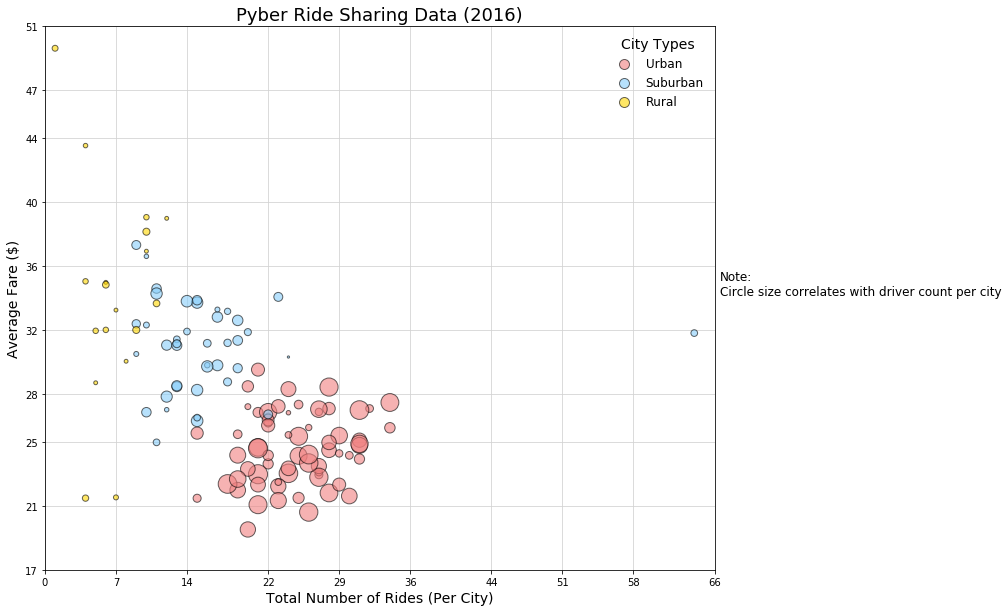

In [7]:
# plot the graph
plt.figure(figsize=(12,10))

# urban plot
plt.scatter(urban_city_rides_axis, urban_city_fare_axis,s=[x*5 for x in urban_city_driver_axis], 
                 edgecolors='black', facecolor='lightcoral', alpha=.6, zorder=3,  label='Urban')

# suburban plot
plt.scatter(suburban_city_rides_axis, suburban_city_fare_axis,s=[x*5 for x in suburban_city_driver_axis], 
                 edgecolors='black', facecolor='lightskyblue', alpha=.6, zorder=3,  label='Suburban')

# rural plot
plt.scatter(rural_city_rides_axis, rural_city_fare_axis,s=[x*5 for x in rural_city_driver_axis], 
                 edgecolors='black', facecolor='gold', alpha=.6, zorder=3,  label='Rural')


plt.xlim(0, max(max(suburban_city_rides_axis),max(urban_city_rides_axis),max(rural_city_rides_axis)) + 2)
plt.ylim(min(min(suburban_city_fare_axis),min(urban_city_fare_axis),min(rural_city_fare_axis)) - 2,
         max(max(suburban_city_fare_axis),max(urban_city_fare_axis),max(rural_city_fare_axis)))

plt.xticks(np.linspace(0,max(max(suburban_city_rides_axis),max(urban_city_rides_axis),max(rural_city_rides_axis)) + 2, 10, dtype=int))
plt.yticks(np.linspace(min(min(suburban_city_fare_axis),min(urban_city_fare_axis),min(rural_city_fare_axis)) - 2,
                       max(max(suburban_city_fare_axis),max(urban_city_fare_axis),max(rural_city_fare_axis)) + 2, 10, dtype=int))

plt.title('Pyber Ride Sharing Data (2016)', size=18)
plt.xlabel('Total Number of Rides (Per City)', size=14)
plt.ylabel('Average Fare ($)', size=14)
plt.annotate('Note:\nCircle size correlates with driver count per city',
            xy=(1, 0.5), xytext=(5, 10), xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points', size=12)
lgnd = plt.legend(fontsize=12, markerscale=1, frameon=False, title='City Types')
plt.setp(lgnd.get_title(),fontsize=14)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

plt.grid(color='lightgray', zorder=0)
plt.show()

## Pie Charts for Percent Comparison

In [8]:
# use function to generate axis zipped list
urban_percs =    city_type_perc(urban_df, 'Urban', city_ride_df)
suburban_percs = city_type_perc(suburban_df, 'Suburban', city_ride_df)
rural_percs =    city_type_perc(rural_df, 'Rural', city_ride_df)

zippidie_doo_dah = list(zip(urban_percs, suburban_percs, rural_percs))

In [9]:
# pie attributes
labels = ['Urban','Suburban','Rural']
colors = ['lightcoral','lightskyblue','gold']
explode = (0.1,0,0)

## Total Fares by City Type

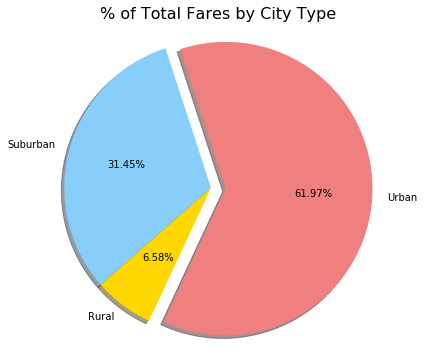

In [10]:
plt.figure(figsize=(6,6))
plt.pie(zippidie_doo_dah[0], labels=labels, explode=explode, shadow=True, startangle=245,
        autopct='%.2f%%', colors=colors)
plt.title('% of Total Fares by City Type', size=16)
plt.axis('equal')
plt.show()

## Total Rides by City Type

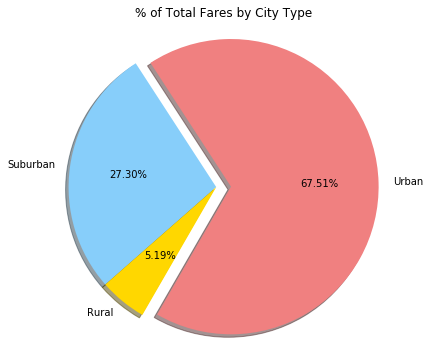

In [11]:
plt.figure(figsize=(6,6))
plt.pie(zippidie_doo_dah[1], labels=labels, explode=explode, shadow=True, startangle=240,
        autopct='%.2f%%', colors=colors)
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

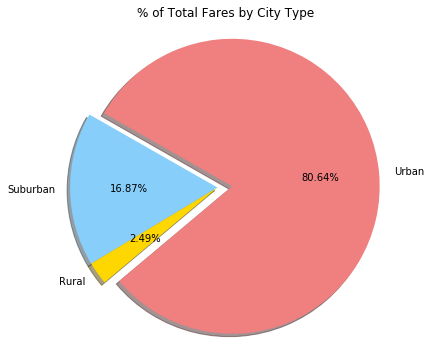

In [12]:
plt.figure(figsize=(6,6))
plt.pie(zippidie_doo_dah[2], labels=labels, explode=explode, shadow=True, startangle=220,
        autopct='%.2f%%', colors=colors)
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()